In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# Imports:
from hammer_sim import G_ACCEL, SimpleHammerSimulation, MotorizedHammerSimulation, TorsionalSpringSimulation
import os
import numpy as np

In [58]:
json_filename = "hammer_parameters.json"

In [59]:
simple_sim = SimpleHammerSimulation(json_filename)
simple_sim.run_sim()

In [60]:
def torque_func(speed_rad):
    speed_rpm = (speed_rad / 2 / np.pi) * 60
    torque_oz = (360 - speed_rpm / 3) # https://www.mcmaster.com/2709K17/
    return torque_oz / 141.6119322780592   # https://www.convertunits.com/from/oz-in/to/N-m 
motorized_sim = MotorizedHammerSimulation(json_filename, torque_func)
motorized_sim.run_sim()

In [61]:
max_torque_in = 40 # https://www.mcmaster.com/9287K136/
deg_range = 180
spring_sim = TorsionalSpringSimulation(json_filename, max_torque_in / 8.8507457916, np.deg2rad(deg_range))
spring_sim.run_sim()

6.2785811889640994


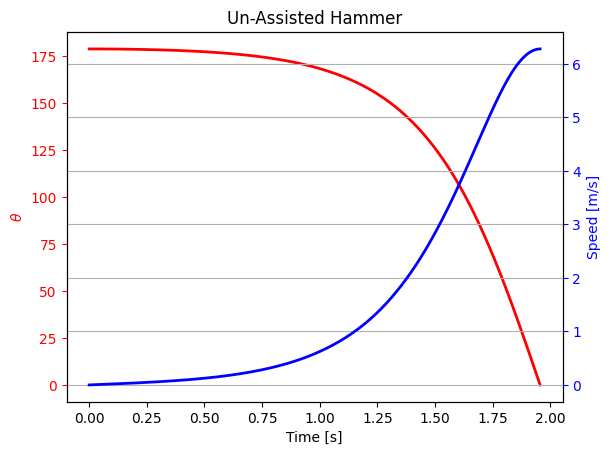

In [62]:
print(simple_sim.get_max_speed())
simple_sim.plot_speed_and_angle("Un-Assisted Hammer")

6.590458145065652


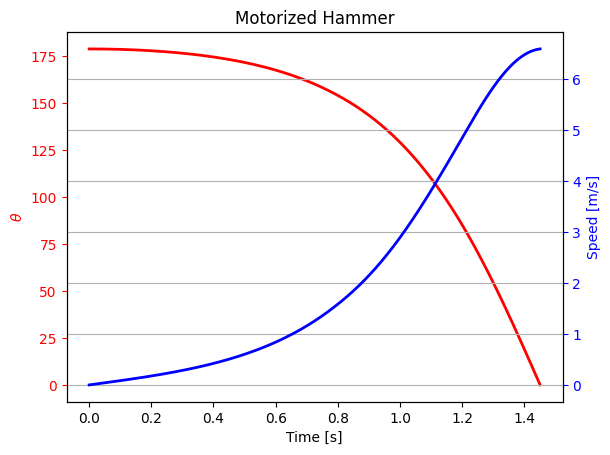

In [63]:
print(motorized_sim.get_max_speed())
motorized_sim.plot_speed_and_angle("Motorized Hammer")

6.556384276834959


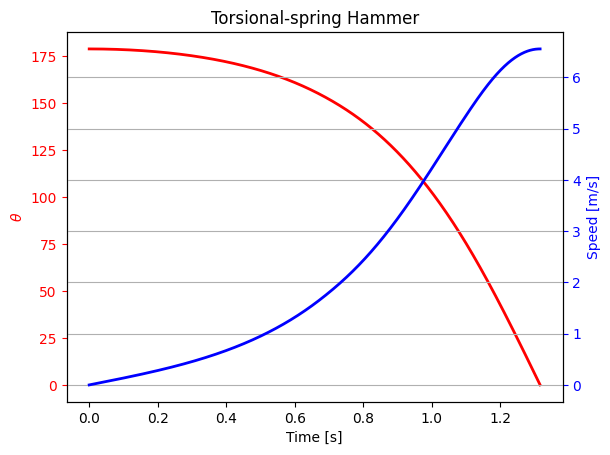

In [64]:
print(spring_sim.get_max_speed())
spring_sim.plot_speed_and_angle("Torsional-spring Hammer")